In [1]:
%load_ext autoreload
%autoreload 2
%tb

No traceback available to show.


In [2]:
import networkx as nx
from graph2plan.dcel.create import create_embedding
from graph2plan.dcel.extract_faces import extract_faces, prep_dual, create_dual, DualVertex, show_st
from graph2plan.dcel.interfaces import Edge, Edges
from graph2plan.dual.examples import kant_G1, get_outer_face_st_graph, embed_other_target, embed_other_source, complete_kant_G1, embed_target_source_edge
from sympy import Line, Point, sqrt

In [3]:
dv = DualVertex(0, [1], (1,2), "LEFT")
print(dv[1:])

([1], (1, 2), 'LEFT')


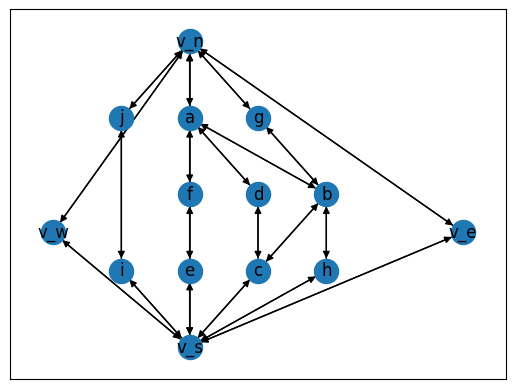

In [7]:
PG, pos, de = complete_kant_G1()
nx.draw_networkx(PG.to_directed(), pos)

In [8]:
de

[('v_s', 'i'),
 ('v_s', 'e'),
 ('v_s', 'c'),
 ('v_s', 'h'),
 ('i', 'j'),
 ('e', 'f'),
 ('c', 'd'),
 ('c', 'b'),
 ('h', 'b'),
 ('j', 'v_n'),
 ('f', 'a'),
 ('d', 'a'),
 ('b', 'a'),
 ('b', 'g'),
 ('a', 'v_n'),
 ('g', 'v_n'),
 ('v_s', 'v_e'),
 ('v_e', 'v_n'),
 ('v_s', 'v_w'),
 ('v_w', 'v_n'),
 ('v_s', 'v_n')]

In [ ]:
PG.edges["i", "j"]

KeyError: 'hello'

In [9]:
ef = prep_dual(PG, de)
ef.keys()

dict_keys([('v_s', 'i'), ('v_s', 'e'), ('v_s', 'c'), ('v_s', 'h'), ('i', 'j'), ('e', 'f'), ('c', 'd'), ('c', 'b'), ('h', 'b'), ('j', 'v_n'), ('f', 'a'), ('d', 'a'), ('b', 'a'), ('b', 'g'), ('a', 'v_n'), ('g', 'v_n'), ('v_s', 'v_e'), ('v_e', 'v_n'), ('v_s', 'v_w'), ('v_w', 'v_n'), ('v_s', 'v_n')])

In [25]:
ef['v_s', 'v_n']

FacePair(left=Face(vertices=['v_n', 'v_s', 'v_e']), right=Face(vertices=['v_s', 'v_n', 'v_w']))

st!
==>> west_vertex: v_f18
==>> east_vertex: v_f17


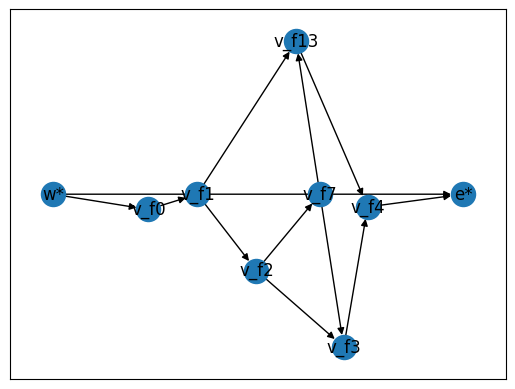

In [10]:
DG, Dpos = create_dual(ef, pos)


In [32]:
DG.nodes["v_f2"]

{'face': Face(vertices=['j', 'i', 'v_s', 'v_w', 'v_n']),
 'edge': ('i', 'j'),
 'side': 'LEFT'}

In [33]:
ef['i', 'j']

FacePair(left=Face(vertices=['j', 'i', 'v_s', 'v_w', 'v_n']), right=Face(vertices=['i', 'j', 'v_n', 'a', 'f', 'e', 'v_s']))

In [11]:
show_st(DG)

==>> sources: ['w*']
==>> targets: ['e*']
